In [6]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Optional: set plot style
plt.style.use('seaborn-v0_8')


In [4]:
# Load Job Change dataset
job_df = pd.read_csv("Downloads/OCTOBER 2025 ALL DATA/job_change_data.csv")
print("✅ Job change dataset loaded successfully")
print("Shape:", job_df.shape)

# Load Students Performance dataset
students_df = pd.read_excel("Downloads/OCTOBER 2025 ALL DATA/students_performance_records.xlsx", sheet_name=0)
print("\n✅ Students performance dataset loaded successfully")
print("Shape:", students_df.shape)


✅ Job change dataset loaded successfully
Shape: (2129, 13)

✅ Students performance dataset loaded successfully
Shape: (2392, 15)


In [8]:
# Inspecting & Cleaning the Students Dataset

# Display first few rows to understand the data
display(students_df.head())

# Show info about columns and data types
students_df.info()

# Check for missing values
print("\n🧩 Missing values per column:\n", students_df.isna().sum())

# Handle missing values safely (no chained assignment warning)
for col in students_df.columns:
    if students_df[col].dtype in ['float64', 'int64']:
        students_df[col] = students_df[col].fillna(students_df[col].mean())
    else:
        students_df[col] = students_df[col].fillna(students_df[col].mode()[0])

print("\n✅ Missing values handled successfully — warnings suppressed.")
print("\n🧮 Summary after cleaning:")
display(students_df.describe(include='all').T)


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Male,Caucasian,Some College,19.833723,7,1,2,0,0,YES,0,2.929196,2
1,1002,18,Female,Caucasian,High School,15.408756,0,0,1,0,0,No,0,3.042915,1
2,1003,15,Female,Asian,Bachelor's,4.210570,26,0,2,0,0,No,0,0.112602,4
3,1004,17,Male,Caucasian,Bachelor's,10.028829,14,0,3,1,0,No,0,2.054218,3
4,1005,17,Male,Caucasian,Some College,4.672495,17,1,3,0,0,No,0,1.288061,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2390 non-null   object 
 3   Ethnicity          2391 non-null   object 
 4   ParentalEducation  2391 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   object 
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 280.4+ KB

🧩 Missing va

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
StudentID,2392.0,NaN,NaN,NaN,2196.5,690.655244,1001.0,1598.75,2196.5,2794.25,3392.0
Age,2392.0,NaN,NaN,NaN,16.468645,1.123798,15.0,15.0,16.0,17.0,18.0
Gender,2392,4,Male,1223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethnicity,2392,4,Caucasian,1207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ParentalEducation,2392,5,High School,970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StudyTimeWeekly,2392.0,NaN,NaN,NaN,9.81129,5.94843,0.001057,5.043079,9.713383,14.409438,100.414243
Absences,2392.0,NaN,NaN,NaN,14.541388,8.467417,0.0,7.0,15.0,22.0,29.0
Tutoring,2392.0,NaN,NaN,NaN,0.301421,0.458971,0.0,0.0,0.0,1.0,1.0
ParentalSupport,2392.0,NaN,NaN,NaN,2.122074,1.122813,0.0,1.0,2.0,3.0,4.0
Extracurricular,2392.0,NaN,NaN,NaN,0.383361,0.486307,0.0,0.0,0.0,1.0,1.0


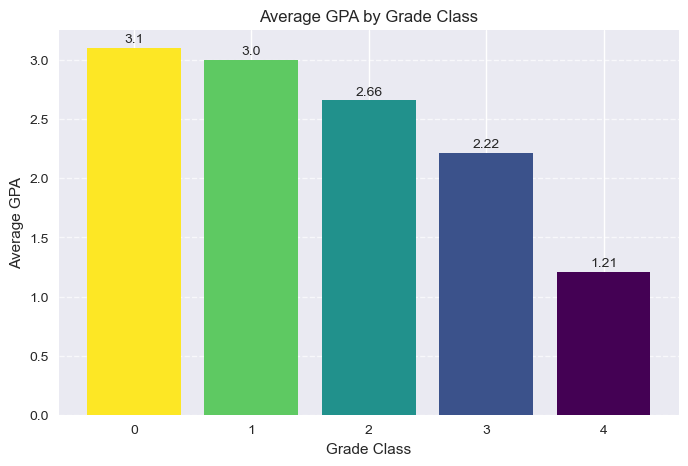

In [10]:
# BAR CHART & AVERAGE GPA BY GRADE CLASS

# Group by GradeClass and calculate average GPA
avg_gpa = students_df.groupby('GradeClass')['GPA'].mean().sort_values()

# Create bar chart
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_gpa)))  # color gradient
bars = plt.bar(avg_gpa.index, avg_gpa.values, color=colors)

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2),
             ha='center', va='bottom', fontsize=10)

plt.title('Average GPA by Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Average GPA')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


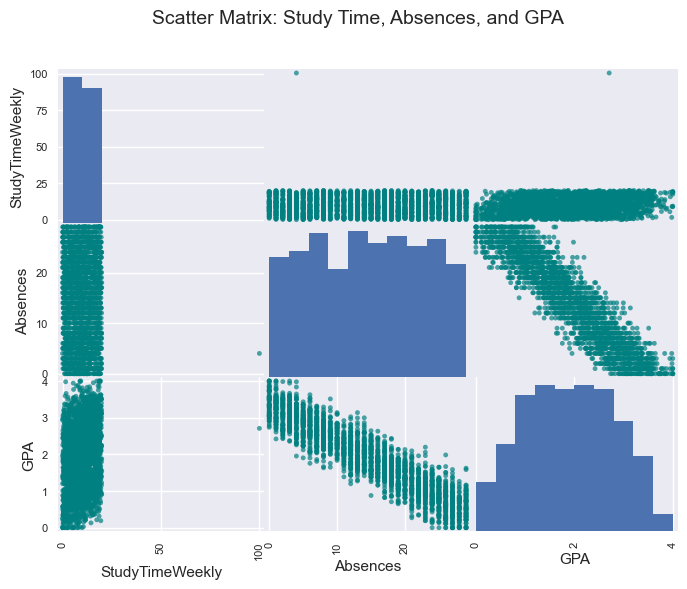

In [12]:
# Scatter Matrix for StudyTimeWeekly, Absences, and GPA


cols = ['StudyTimeWeekly', 'Absences', 'GPA']
scatter_matrix(students_df[cols], alpha=0.7, figsize=(8, 6), diagonal='hist', color='teal')

plt.suptitle('Scatter Matrix: Study Time, Absences, and GPA', fontsize=14)
plt.show()


<Figure size 800x500 with 0 Axes>

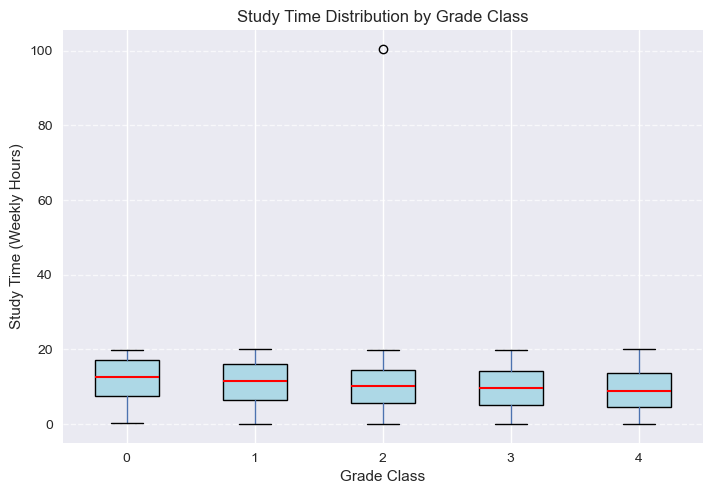

In [14]:
# Box Plot for Study Time Distribution by Grade Class


plt.figure(figsize=(8, 5))

students_df.boxplot(column='StudyTimeWeekly', by='GradeClass',
                    grid=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='red', linewidth=1.5))

plt.title('Study Time Distribution by Grade Class')
plt.suptitle('')
plt.xlabel('Grade Class')
plt.ylabel('Study Time (Weekly Hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [16]:
# LETS REVIEW OUR DATASET AGAIN TO SEE THE EFFECTS

print("\nQuick summary of Job Change Dataset:")
display(job_df.head())
job_df.info()



Quick summary of Job Change Dataset:


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [18]:
# SAVING THE CLEANED DATASET

output_path = "Downloads/OCTOBER 2025 ALL DATA/students_performance_cleaned.csv"
students_df.to_csv(output_path, index=False)
print(f"✅ Cleaned dataset saved to: {output_path}")


✅ Cleaned dataset saved to: Downloads/OCTOBER 2025 ALL DATA/students_performance_cleaned.csv


In [22]:
# THIS IS OPTIONAL- LETS DO A COMBINED ANALYSIS

# Example: show total rows and column overlap
print("\nJob change dataset rows:", job_df.shape[0])
print("Students dataset rows:", students_df.shape[0])
print("Common columns (if any):", set(job_df.columns).intersection(students_df.columns))



Job change dataset rows: 2129
Students dataset rows: 2392
Common columns (if any): set()
